In [ ]:
import tensorflow.keras as K
from matplotlib import pyplot

In [ ]:
#This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
_, (X, Y) = K.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
X.shape

(10000, 32, 32, 3)

In [ ]:
Y.shape

(10000, 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


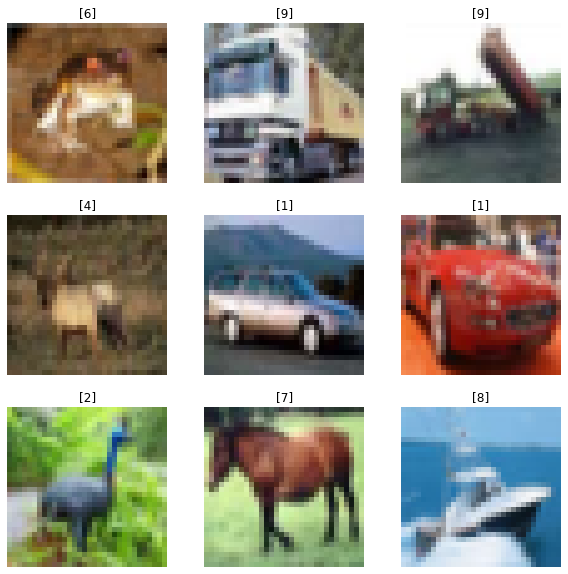

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i])
    plt.title(trainy[i])
    plt.axis("off")


In [ ]:
#!/usr/bin/env python3

import tensorflow.keras as k
import tensorflow as tf
def preprocess_data(X,Y):
  X = k.applications.densenet.preprocess_input(X)
  Y = k.utils.to_categorical(Y, 10)
  return X,Y

(x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)


input = k.layers.Input(shape=(32,32,3))

x = k.layers.Lambda(lambda image: tf.image.resize(image,(224, 224)))(input)
dense = k.applications.DenseNet121(include_top=False,weights='imagenet',input_tensor=x)

output = dense.output
#x = k.layers.Lambda(lambda i:K.resize_images(i,224,224,data_format="channels_last"))(output)
x = k.layers.GlobalAveragePooling2D()(output)
x = k.layers.Dense(512,activation='relu')(x)
x = k.layers.Dense(10,activation='softmax')(x)
Model = k.models.Model(inputs=input,outputs=x)

Model.summary()
Model.compile(loss='categorical_crossentropy',optimizer=k.optimizers.RMSprop(lr=2e-5),metrics=['accuracy'])

for layer in Model.layers[:-2]:
  layer.trainable = False


Model.fit(x_train,y_train,epochs=5,batch_size=32, verbose=1) 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           lambda_3[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
____________________________________________________________________________________________